
# Example 0.3: Tank and Turbine
*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
A steam engine consists of a boiler tank connected to a turbine, as shown below. The boiler tank has a volume of 100 L and initially contains saturated liquid with a very small amount of vapor at 100 kPa. Heat is added by a burner, and the pressure regulator does not open before the boiler pressure reaches 700 kPa, which it keeps constant. The vapor leaving the boiler tank passes through a turbine and is discharged to the atmosphere as saturated vapor at 100 kPa. The burner is turned off when no more liquid is present in the boiler. Assume the turbine is adiabatic and the changes in kinetic and potential energy across the turbine are negligible.
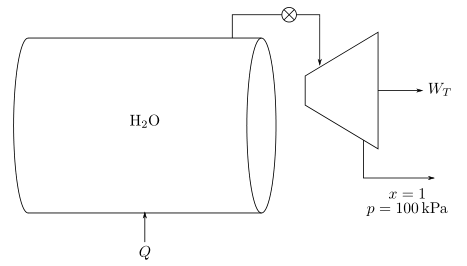

## Solution


### Python Initialization
We'll start by importing the libraries we will use for our analysis.

In [1]:
from kilojoule.templates.default import *

/opt/anaconda/lib/python3.8/site-packages/mpmath/ctx_mp_python.py:892: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:
/opt/anaconda/lib/python3.8/site-packages/mpmath/ctx_mp_python.py:986: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:


We will use the `realfluid.Properties()` class from the `kilojoule` library for this solution

In [2]:
water = realfluid.Properties('Water')

### Given Parameters
We now define variables to hold our known values.

In [3]:
p[1] = Quantity(100,'kPa')            # initial pressure in tank
V_tank = Quantity(100,'L').to('m^3')  # tank volume
p[2] = Quantity(700,'kPa')            # final pressure in tank
p['turbine_exit'] = Quantity(100,'kPa')  # pressure of fluid exiting turbine
x['turbine_exit'] = Quantity(1,'')       # quality of fluid exiting turbine

display.Calculations(locals());

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Assumptions
  - Negligible changes in kinetic energy
  - Negligible changes in potential energy
  - Turbine is adiabatic
  - Tank has quality of approximately 1 at the beginning
  - Tank has quality of approximately 0 at the end
  - Only saturated vapor leaves the tank
  - Constant specific heat (cold-air-standard)

In [4]:
x[1] = Quantity(0,'')                 # initial quality in tank
x[2] = Quantity(1,'')                 # final quality in tank
x['tank_exit'] = Quantity(1,'')       # quality of fluid exiting tank
p['tank_exit'] = p[2]           # pressure of fluid exiting tank

display.Calculations(locals());

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Total Heat Transfer
To determine the required heat transfer, we can focus on a control volume that includes only the tank. We state with the first law for a transient system and cancel out the negligible terms
$$\require{cancel}
\Delta U + \cancel{\Delta KE} + \cancel{\Delta PE} = Q_{1\to2} - \cancel{W_{1\to2}} + \sum_i \cancelto{0}{m_i}\left(h_i + \frac{V_i^2}{2} + gz_i\right) - \sum_e m_e\left( h_e + \cancel{\frac{V_e^2}{2}} + \cancel{gz_e}\right)$$
$$ m_2u_2 - m_1u_1 = Q_{1\to2} - m_eh_e$$
and solve for our variable of interest
$$ Q_{1\to2} = m_2u_2 - m_1u_1  + m_eh_e$$

The initial mass can be found using the volume of the tank and the specific volume at state 1.  To find the specific volume, we need two independent, intensive properties to fix the state.  In this case, we are approximated the initial condition to be a saturated liquid at 100 kPa

In [5]:
# initial specific volume 
v[1] = water.v(p=p[1],x=x[1])

# initial mass in tank
m[1] = V_tank/v[1]

display.Calculations(locals(),comments=True);

 initial specific volume 

<IPython.core.display.Latex object>

 initial mass in tank

<IPython.core.display.Latex object>

The final mass in the tank can be found using the same method by applying the known properties at state 2

In [6]:
# final specific volume 
v[2] = water.v(p=p[2],x=x[2])

# final mass in tank
m[2] = V_tank/v[2]

display.Calculations(locals(),comments=True);

 final specific volume 

<IPython.core.display.Latex object>

 final mass in tank

<IPython.core.display.Latex object>

Based on mass conservation, we can say the change in mass of the tank is equal to the amount of mass exiting the tank (and also the amount flowing through the turbine in our later analysis).

In [7]:
# mass conservation
m['tank_exit'] = m[1]-m[2]

display.Calculations(locals(),comments=True);

 mass conservation

<IPython.core.display.Latex object>

To evaluate the first law, we will also need the internal energies states 1 and 2 and the enthalpy at the exit.  Each of these can also be looked up using two independent, intensive properties

In [8]:
# initial internal energy
u[1] = water.u(p=p[1],x=x[1])

# final internal energy
u[2] = water.u(p=p[2],x=x[2])

# exit enthalpy
h['tank_exit'] = water.h(p=p['tank_exit'],x=x['tank_exit'])

display.Calculations(locals(),comments=True);

 initial internal energy

<IPython.core.display.Latex object>

 final internal energy

<IPython.core.display.Latex object>

 exit enthalpy

<IPython.core.display.Latex object>

We now know all the values required to find the heat transfer to the tank.

In [9]:
# First Law 
Q_1_to_2 = m[2]*u[2] - m[1]*u[1] + m['tank_exit']*h['tank_exit']

display.Calculations(locals(),comments=True);

 First Law 

<IPython.core.display.Latex object>

### Turbine Work
To determine the work produced by the turbine, we can conduct a first law analysis on a control volume that contains only the turbine. We state with the first law for a transient system and cancel out the negligible terms and solving for the variable of interest
$$\require{cancel}
\cancel{\Delta U} + \cancel{\Delta KE} + \cancel{\Delta PE} = \cancel{Q_{1\to2}} - W_{1\to2} + \sum_i m_i\left(h_i + \cancel{\frac{V_i^2}{2}} + \cancel{gz_i}\right) - \sum_e m_e\left( h_e + \cancel{\frac{V_e^2}{2}} + \cancel{gz_e}\right)$$
$$W_{1\to2} = m_ih_i - m_eh_e$$
In this case we are assuming that all the fluid passes completely through the turbine, i.e.\ not fluid remains in the turbine at the end.  Therefore, the entering and exiting mass flows are the same, $m_e=m_i$
$$ W_{1\to2} = m_i(h_i-h_e)$$

We assume the mass exiting the tank is the same as the mass entering the turbine and there are not changes in properties between the tank exit and the turbine inlet.  Therefore, the only missing piece of information to complete our analysis is the enthalpy at the exit of the turbine, which can be found using two independent, intensive properties

In [10]:
h['turbine_exit'] = water.h(p=p['turbine_exit'],x=x['turbine_exit'])

display.Calculations(locals());

<IPython.core.display.Latex object>

We now know all the values required to find the work output of the turbine.

In [11]:
W_1_to_2 = m['tank_exit']*(h['tank_exit']-h['turbine_exit'])

display.Calculations(locals());

<IPython.core.display.Latex object>

### Summary

In [12]:
display.Summary(locals());

<IPython.core.display.Latex object>

,p,v,u,h,x,m
unit,kPa,m³/kg,kJ/kg,kJ/kg,,kg
1,100,0.00104315,417.4,-,0,95.8632
2,700,0.272775,2571.81,-,1,0.366603
tank_exit,700,-,-,2762.75,1,95.4965
turbine_exit,100,-,-,2674.95,1,-
